In [142]:
import tensorflow as tf

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [144]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [145]:
X_valid = X_train_full[:5000]/255.0
y_valid = y_train_full[:5000]
X_train = X_train_full[5000:]/255.0
y_train = y_train_full[5000:]
X_test = X_test/255.0

In [146]:
from functools import partial

In [147]:
my_dense_layer = partial(tf.keras.layers.Dense, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.0008))

In [148]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    my_dense_layer(300,activation=None),
    tf.keras.layers.PReLU(),
    my_dense_layer(300,activation=None),
    tf.keras.layers.PReLU(),
    my_dense_layer(100,activation=None),
    tf.keras.layers.PReLU(),
    my_dense_layer(100,activation=None),
    tf.keras.layers.PReLU(),
    my_dense_layer(50,activation=None),
    tf.keras.layers.ReLU(),
    my_dense_layer(10)
])

In [149]:
def scheduler(epoch):
    if epoch < 10:
        return 0.0005
    else:
        return 0.0005*tf.math.exp(0.1*(10-epoch))

In [150]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [151]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(X_train,y_train,epochs = 50, callbacks=[callback], validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 7s 120us/sample - loss: 0.9901 - accuracy: 0.8095 - val_loss: 0.7301 - val_accuracy: 0.8568
Epoch 2/50
55000/55000 [==============================] - 6s 107us/sample - loss: 0.6775 - accuracy: 0.8541 - val_loss: 0.5936 - val_accuracy: 0.8718
Epoch 3/50
55000/55000 [==============================] - 6s 108us/sample - loss: 0.5868 - accuracy: 0.8604 - val_loss: 0.5487 - val_accuracy: 0.8692
Epoch 4/50
55000/55000 [==============================] - 6s 108us/sample - loss: 0.5343 - accuracy: 0.8668 - val_loss: 0.5296 - val_accuracy: 0.8638
Epoch 5/50
55000/55000 [==============================] - 6s 109us/sample - loss: 0.5027 - accuracy: 0.8733 - val_loss: 0.4965 - val_accuracy: 0.8726
Epoch 6/50
55000/55000 [==============================] - 6s 107us/sample - loss: 0.4846 - accuracy: 0.8745 - val_loss: 0.4881 - val_accuracy: 0.8768
Epoch 7/50
55000/55000 [===========================

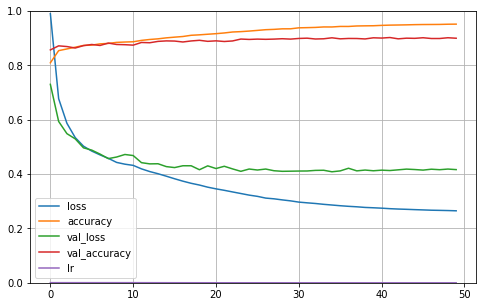

In [157]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show
plt.savefig('learning_curve.pdf')

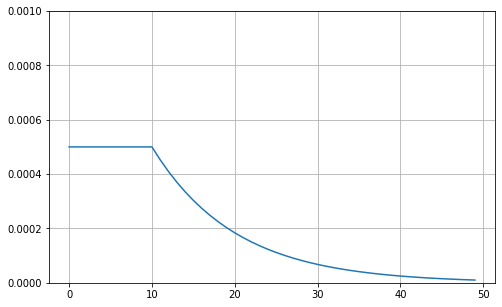

In [160]:
pd.DataFrame(history.history)['lr'].plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,0.001)
plt.show
plt.savefig('learning_rate.pdf')

In [153]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train,y_pred)
print(conf_train)
print(np.tril(conf_train,-1)+np.triu(conf_train,1))

[[5040    0   69   60    4    0  359    1    9    1]
 [   0 5407    1   27    7    0    1    0    1    0]
 [  47    0 4958   28  269    0  193    0    1    0]
 [  40    4   13 5286  108    0   46    0    2    0]
 [   2    1  195   91 5036    0  182    0    5    0]
 [   0    0    0    0    0 5507    0    0    0    0]
 [ 277    2  187   66  164    0 4810    0    1    0]
 [   0    0    0    0    0    0    0 5440    1   47]
 [   4    0    2    7    4    0    6    2 5485    0]
 [   0    1    0    0    0    0    0   83    1 5409]]
[[  0   0  69  60   4   0 359   1   9   1]
 [  0   0   1  27   7   0   1   0   1   0]
 [ 47   0   0  28 269   0 193   0   1   0]
 [ 40   4  13   0 108   0  46   0   2   0]
 [  2   1 195  91   0   0 182   0   5   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [277   2 187  66 164   0   0   0   1   0]
 [  0   0   0   0   0   0   0   0   1  47]
 [  4   0   2   7   4   0   6   2   0   0]
 [  0   1   0   0   0   0   0  83   1   0]]


In [154]:
pd.DataFrame(history.history)['val_accuracy'].max()

0.902400016784668

In [155]:
y_pred = model.predict_classes(X_test)

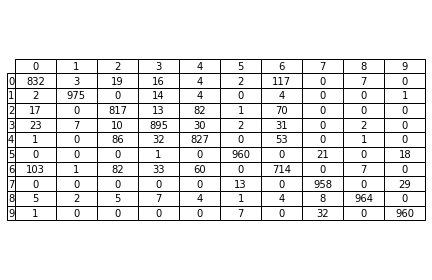

In [161]:
df = pd.DataFrame(conf_test)
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=df.values,rowLabels=np.arange(10),colLabels=np.arange(10),loc='center',cellLoc='center')
fig.tight_layout()
plt.savefig('conf_matr.pdf')